<h1> 3.1 Análisis de los residos del Modelo SARIMA(p,d,q)(P,Q,D)[m] </h1>

<h2> Preprocesamiento de datos y packages </h2>


In [28]:
library(ggplot2)
library(xts)
library(forecast)
library(dplyr)
library(tseries)
library(zoo)
library(quantmod)
library(nortest) #Para pruebas de normalidad
library(TTR)
setwd("C:\\Users\\81799\\OneDrive\\Documentos\\ESFM_CLASES\\Servicio Social ARTF\\Machine Learning\\section1\\ARTF_2017_2020\\ABRIL_ARTF")
Ton_Netas_P <- read.csv("Toneladas_Netas__Productos_2014_2022.csv")#Leer DF
Ton_Netas_P <- Ton_Netas_P[-99,]#Elimino la última fila
Ton_Netas_P$X <- as.yearmon(as.factor(Ton_Netas_P$X), format ="%m/%Y")
T_N_Pro  <- Ton_Netas_P # Contiene las fechas
Ton_Netas_P <- xts(Ton_Netas_P[,c(2:6)], order.by = Ton_Netas_P$X )
T_N_P <-  data.frame(Ton_Netas_P) #Ordeno por fechas y la trae como indice
Maiz_ts <- ts(T_N_P[,1], frequency = 12, star = c(2014,1))
SARIMA_4<- arima(Maiz_ts,order=c(1,1,1), seasonal = list(order=c(1,1,1)))

<h2> Diagnostico del modelo SARIMA(1,1,1)(1,1,1)[12] </h2>

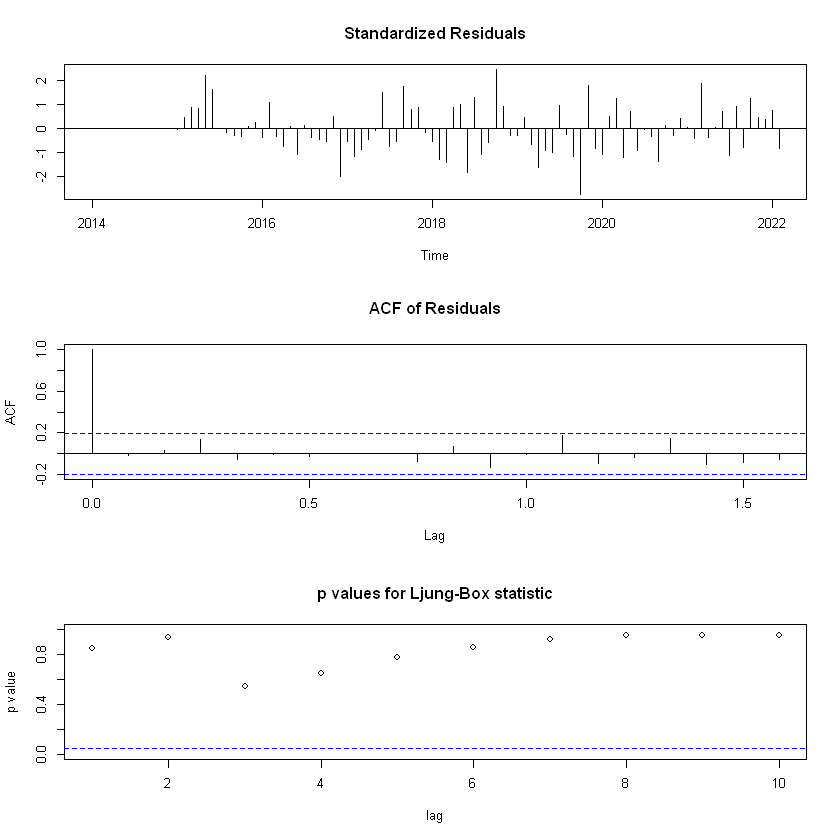

In [23]:
tsdiag(SARIMA_4)

En la gráfica podemos ver los p-valor de **Ljung Box**, en donde recordemos que si el $P-valor > 0,05$,
entonces hay **Ruido Blanco**.

Dado lo anterior, vemos que el modelo dado tiene *Ruido Blanco*, con
esto concluimos que se ajusta bien. 
También podemos notar que la gráfica de $ACF$ no hay valores de significancia (afuera de la franja azul), esto quiere decir que no hay correlación en los errores, es decir:
$$corr(\varepsilon_t , \varepsilon_{t-k})=0$$
Para todo $k\geq 1$ que pertenezca a los no. Naturales.

<h2> Correlogramas $ACF$ y $PACF$ del modelo $SARIMA(1,1,1)(1,1,1)[12]$ </h2>

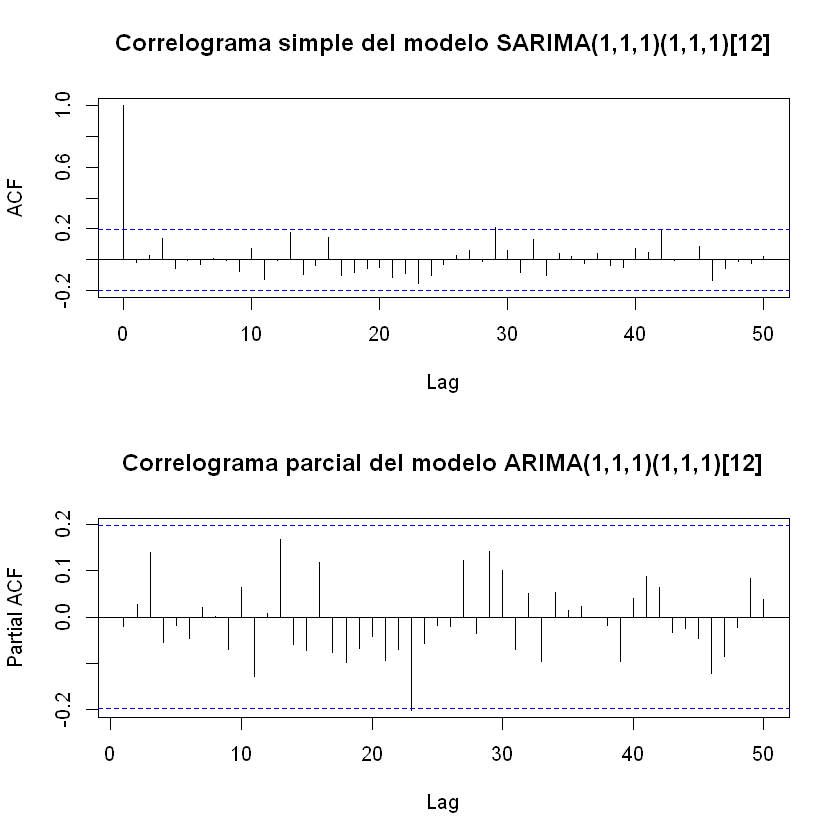

In [24]:
layout(1:2)
acf(ts(SARIMA_4$residuals), 50 ,
    main = "Correlograma simple del modelo SARIMA(1,1,1)(1,1,1)[12]")
pacf(ts(SARIMA_4$residuals), 50 ,
    main = "Correlograma parcial del modelo ARIMA(1,1,1)(1,1,1)[12]")

En esta ocasión observamos que en el Correlograma Simple, como el en Correlograma Parcial solamente hay un valor $\varphi $ significativo, pero es muy muy mínimo. Así que en esta ocasión nuestro modelo se ajusta muy bien.

<h2> Gráfico de Raíces Unitarias </h2>

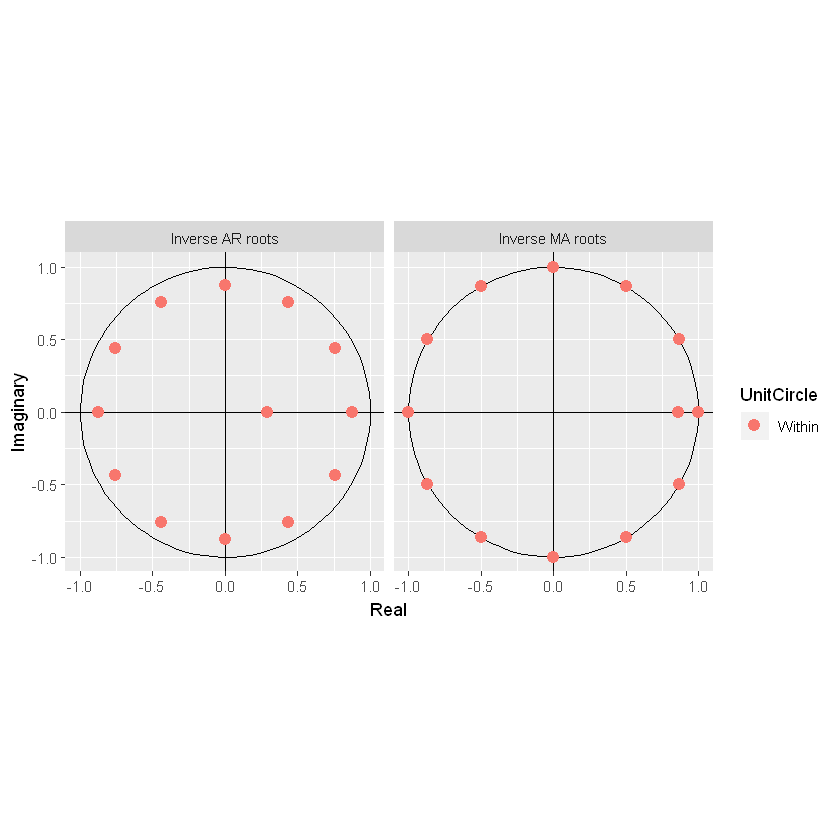

In [34]:
autoplot(SARIMA_4)+theme_gray()

Las raíces del proceso $SARIMA(1,1,1)(1,1,1)$ en el modelo propuesto se encuentran dentro del *círculos unitario* en el caso de $AR$, pero en las del modelo $MA$ están justo en la raya del círculo.
Una vez comprobado este supuesto, podremos continuar con realizar los supuestos sobre los errores de las estimaciones del modelo. El cumplimiento
de los supuestos básicos sobre los residuos es de suma importancia para el uso de pronósticos con modelos de series de tiempo, debido a que lo que se busca es que no exista ( o que al menos no de
manera importante) ninguna variable determinista que pueda afectar al modelo, dejando "limpia" esa
variable, y por lo tanto, lo que sobre sea una variable **puramente aleatoria**. Para esto, tendremos que
contrastar con unas últimas pruebas si estos errores se distribuyen o no de manera **normal**. como una
primera impresión, podemos ocupar la función checkresiduals() con este código

<h2> checkresiduals() en R </h2>


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)(1,1,1)[12]
Q* = 16.244, df = 16, p-value = 0.436

Model df: 4.   Total lags used: 20



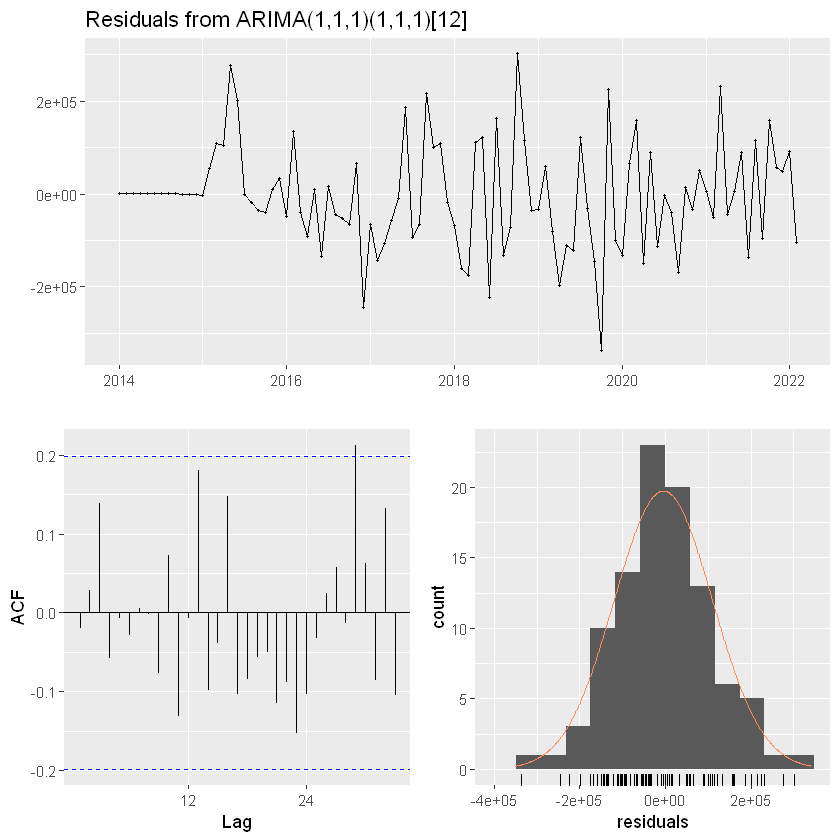

In [35]:
checkresiduals(SARIMA_4)

Al utilizar la función, podemos apreciar una imagen que cuenta con 3 gráficas útiles:
1. Gráfica de los residuos: Podemos contrastar que, en efecto, los errores se mantienen en una media constate igual a cero, y dentro de unos intervalos de varianza entre 250000 y −250000.
2. Histograma junto con una gráfica de distribución: Observamos que la serie tiene un comportamiento ligeramente normal, ya que no presenta un importante sesgo ni una fuerte curtosis.

 Para contrastar el cumplimiento del supuesto de
**NO autocorrelación**, realizamos la prueba **Ljung-Box** sobre los errores, utilizando el siguiente código:

<h2> Prueba Ljung-Box </h2>

* $H_0:$ Ruido Blanco
* $H_a:$ No hay Ruido Blanco

In [36]:
Box.test(SARIMA_4$residuals , type = "Ljung-Box")


	Box-Ljung test

data:  SARIMA_4$residuals
X-squared = 0.037373, df = 1, p-value = 0.8467


Al realizar la prueba Ljung-Box sobre los residuos del modelo, con un p-valor mucho mayor al 0.05 nivel de significancia, podemos **aceptar la hipótesis nula $H_0$** de que la serie no tiene problemas de
auto-correlación.

<h2> Pruebas de Normalidad </h2>


Para realizar la prueba de normalidad, vamos a proponer dos pruebas estadísticas:
1. **Prueba de Jarque-Bera**
3. **Prueba de Shapiro** 

Las pruebas están dadas de la siguiente manera:
* $H_0:$ Los datos se comportan como una distribución normal.
* $H_a:$ Los datos NO se comportan como una distribución normal.


El uso de las pruebas, al igual que el uso de las pruebas de raíces unitarias, servirán para confirmar
de mejor manera el cumplimiento o el incumplimiento del supuesto de normalidad de la serie. Lo
anterior lo hacemos de la siguiente manera 

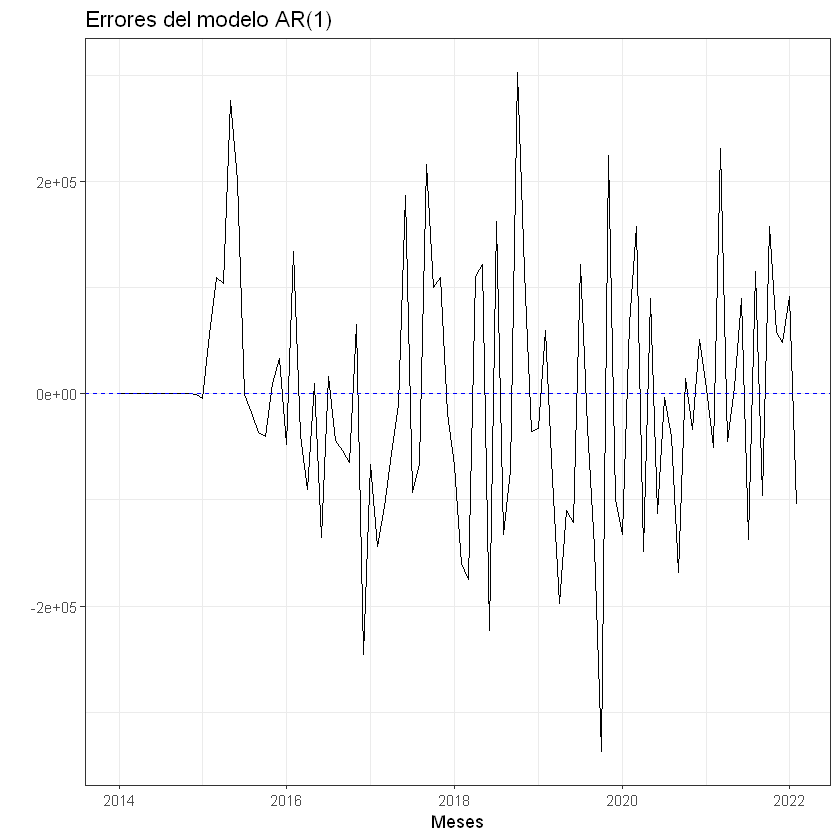

In [37]:
Error = residuals(SARIMA_4) #Errores utilizando ARIMA(1,0,0)
autoplot(Error)+geom_hline(yintercept = 0, lty = 2, color ="blue")+
labs(title = "Errores del modelo AR(1)", x="Meses", y= " ")+theme_bw()

<h2> Prueba de Jarque-Bera </h2>

En estadística, **la prueba de Jarque-Bera** es una prueba de bondad de ajuste para comprobar si una muestra de datos tienen la asimetría y la curtosis de una distribución normal

In [40]:
jarque.bera.test(SARIMA_4$residuals)


	Jarque Bera Test

data:  SARIMA_4$residuals
X-squared = 0.94851, df = 2, p-value = 0.6223


El resultado de la prueba, al igual que otros contrastes que hemos mencionado, se puede confirmar
observando el $p-valor$ obtenido. De acuerdo con los resultados de la prueba, con un p-valor mayor al 0.05,
**Se Acepta la hipótesis nula de normalidad ($H_0$)** sobre los residuos del modelo seleccionado. Confirmamos que
**el modelo tiene residuos que se distribuyen de manera normal**.

Por otra parte, procedemos a confirmar
el supuesto de normalidad sobre los residuos utilizando de manera paralela la **prueba de Shapiro**.

<h2> Prueba de Shapiro-Wilk </h2>

La Prueba de Shapiro-Wilk se usa para contrastar la normalidad de un conjunto de datos.


In [41]:
shapiro.test(SARIMA_4$residuals)


	Shapiro-Wilk normality test

data:  SARIMA_4$residuals
W = 0.98651, p-value = 0.4201


El p-valor de la prueba, con un valor de $0.4401$, mucho mayor al nivel de significancia del $0.05$,
**se acepta la hipótesis nula ($H_0$) de normalidad sobre los residuos del modelo** $SARIMA(1,1,1)(1,1,1)[12]$.





<h2> Contraste de normalidad con Q-Q plot </h2>

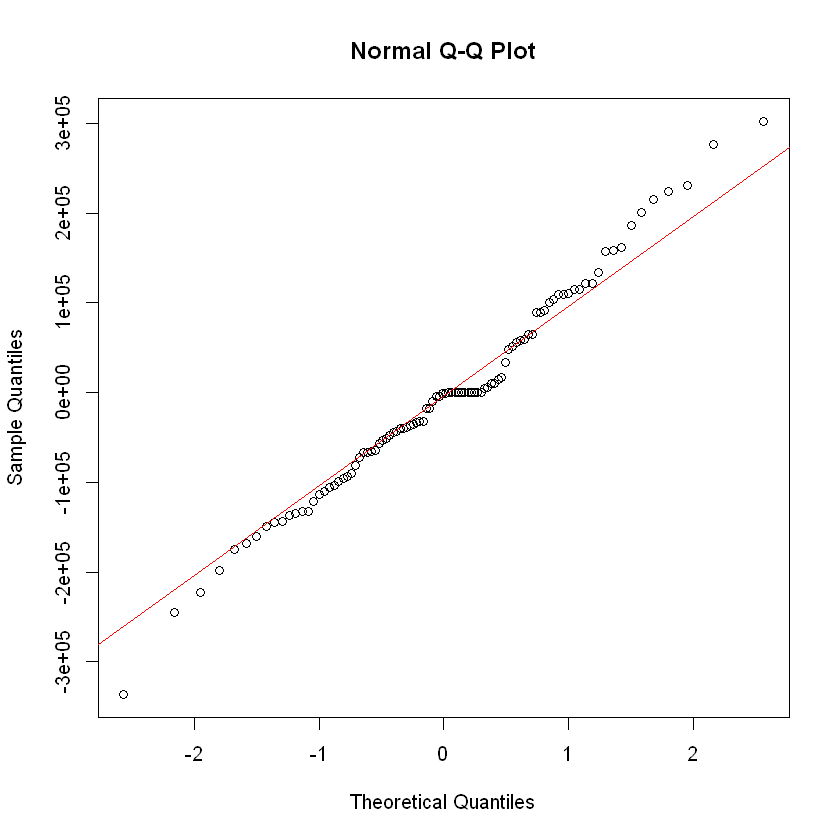

In [43]:
qqnorm(SARIMA_4$residuals)
qqline(SARIMA_4$residuals, col = "2")

<h2> Prueba de Dickey-Fuller Aumentada a residuos de SARIMA(1,1,1)(1,1,1)[12] </h2>

In [48]:
adf.test(SARIMA_4$residuals)


	Augmented Dickey-Fuller Test

data:  SARIMA_4$residuals
Dickey-Fuller = -3.9979, Lag order = 4, p-value = 0.01234
alternative hypothesis: stationary


Podemos observar que la gran mayoría de puntos se alinean dentro de los datos simulados normales,
de tal manera que se confirmar que los residuos de la serie presentan una distribución normal, con una media igual a cero $E[\varepsilon =0]$ y una varianza constante $Var[\varepsilon ]=c$. Con estas pruebas podemos confirmar que los pronósticos que arrojara el modelo serán los más eficientes posibles.

**Conclusión:** El modelo $AR(1,1,1)(1,1,1)[12]$ es eficiente para poder hacer un pronóstico.$